In [ ]:
from google.colab.patches import cv2_imshow
import numpy as np
import cv2 as cv

In [ ]:
def draw_triangle(im, triangle, color=(0,255,0)):
    #Normalizar coordenadas homogéneas
    triangle = np.array([v[:-1]/v[-1] for v in triangle], np.int32) # cambiar a np.int32
    cv.drawContours(im, [triangle], 0, color, -1)
    for v in triangle:
        cv.circle(im, tuple(v), 2, (255,0,255),-1)

In [ ]:
def scale(vertex, sx, sy):
    scaling_matrix = np.array([[sx, 0, 0],
                               [0, sy, 0],
                               [0, 0, 1]])
    return np.dot(scaling_matrix, vertex)

In [ ]:
def rotate(vertex, a):
    radian_angle = np.radians(a)
    rotation_matrix = np.array([[np.cos(radian_angle), -np.sin(radian_angle), 0],
                                [np.sin(radian_angle), np.cos(radian_angle), 0],
                                [0, 0, 1]])
    return np.dot(rotation_matrix, vertex)

In [ ]:

def translate(vertex, dx, dy):
    translation_matrix = np.array([[1, 0, dx],
                                   [0, 1, dy],
                                   [0, 0, 1]])
    return np.dot(translation_matrix, vertex)

In [ ]:
#Tamaño de la imagen
w = 500
h = 500
im = np.zeros((h,w,3), np.uint8)

In [ ]:
#Parámetros de las transformaciones
#Trasladar al centro y realizar escala y rotación
angle = 30 #ángulo de rotación
s = 3      #factor de escala
t = 250    #factor de traslación

In [ ]:
#Sistema coordenado de imágenes
triangle1 = np.array([[10, 10, 1], [70, 10, 1], [40, 60, 1]])
triangle2 = translate(rotate(scale(triangle1.T, s, s), angle), t, t).T

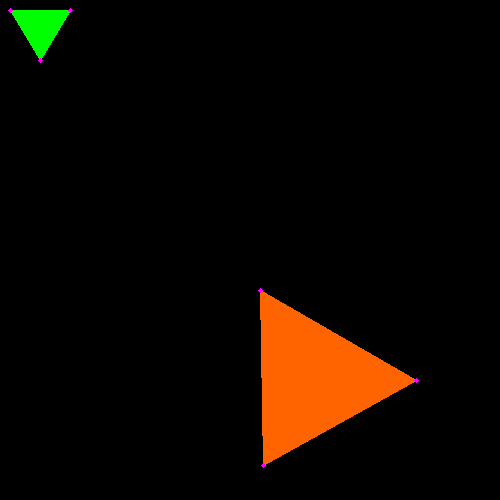

In [ ]:
draw_triangle(im, triangle1)
draw_triangle(im, triangle2, color=(0,100,255))

cv2_imshow(im)